In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [271]:
train = pd.read_csv('train.csv', encoding='CP949')
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [272]:
test = pd.read_csv('test.csv', encoding='CP949')
test.head(2)


,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복


In [273]:
df1 = train.copy()

In [274]:
df1.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [275]:
df1.groupby(['총구매액','구매건수'])['평균구매가격','평균할부개월수'].agg('sum','mean').head()

<ipython-input-275-6d9446042fbf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby(['총구매액','구매건수'])['평균구매가격','평균할부개월수'].agg('sum','mean').head()


,,평균구매가격,평균할부개월수
총구매액,구매건수,,
-1237971,17,-72822,1.7
-404945,29,-13964,1.2
-81754,6,-13626,3.2
6500,9,722,4.3
24000,1,24000,1.0


In [276]:
df1_sum = df1.groupby('주구매코너')['구매건수'].sum()

In [277]:
df1_sum.head()

주구매코너
가구          100
가전          315
기타바이어       149
니트단품       2542
도자기크리스탈     261
Name: 구매건수, dtype: int64

In [278]:
df1_sum = df1_sum.reset_index()
df1_sum.columns = ['주구매코너', '구매건수']

In [279]:
df1_sum

,주구매코너,구매건수
0,가구,100
1,가전,315
2,기타바이어,149
3,니트단품,2542
4,도자기크리스탈,261
5,디자이너부띠끄,2219
6,문화완구,848
7,섬유,1627
8,수입명품,4846
9,스포츠,10664


In [280]:
df1.head(3)

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구


In [281]:
df1_merge = df1.merge(df1_sum, how='left', on='주구매코너')
df1_merge

,custid,gender,총구매액,구매건수_x,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,구매건수_y
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품,25740
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼,8285
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구,1165
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품,25740
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A,880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,일반식품,76174
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,6.0,6.0,1.0,3.0,NaN,14.0,디자이너부띠끄,2219
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,NaN,21.0,화장품,25740
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,NaN,2.0,11.0,피혁A,880


In [282]:
features = []

In [283]:
f = df1.groupby('custid')['구매건수'].agg([('코너별구매건수', 'sum')]).reset_index()
features.append(f)
f

,custid,코너별구매건수
0,18,15
1,21,9
2,23,36
3,26,28
4,35,5
...,...,...
4995,49952,93
4996,49954,17
4997,49957,37
4998,49975,13


In [284]:
f = df1.groupby('custid')['평균구매가격'].agg([('평균할부개월수', 'mean')]).reset_index()
features.append(f); f

,custid,평균할부개월수
0,18,45340
1,21,39272
2,23,157539
3,26,70143
4,35,177000
...,...,...
4995,49952,71683
4996,49954,183065
4997,49957,158175
4998,49975,50346


In [285]:
features

[      custid  코너별구매건수
 0         18       15
 1         21        9
 2         23       36
 3         26       28
 4         35        5
 ...      ...      ...
 4995   49952       93
 4996   49954       17
 4997   49957       37
 4998   49975       13
 4999   49993       32
 
 [5000 rows x 2 columns],
       custid  평균할부개월수
 0         18    45340
 1         21    39272
 2         23   157539
 3         26    70143
 4         35   177000
 ...      ...      ...
 4995   49952    71683
 4996   49954   183065
 4997   49957   158175
 4998   49975    50346
 4999   49993    79835
 
 [5000 rows x 2 columns]]

In [286]:
df1['custid'].value_counts(normalize=True)

4094     0.0002
43910    0.0002
44482    0.0002
23230    0.0002
49314    0.0002
          ...  
34110    0.0002
47334    0.0002
23873    0.0002
17730    0.0002
18433    0.0002
Name: custid, Length: 5000, dtype: float64

In [287]:
df1.groupby('gender')['custid'].mean()

gender
0    22705.701064
1    30906.869822
Name: custid, dtype: float64

In [288]:
df1.loc[(df1.gender.isnull())&(df1.gender=='woman'),'gender']='0'
df1.loc[(df1.gender.isnull())&(df1.gender=='man'),'gender']='1'

In [289]:
df1.gender.isnull().any()

False

In [290]:
df1_new_data = [train, test]
df1_new_data

[      custid  gender     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  \
 0         18       0   680100    15   45340      1.7        9    10   
 1         21       0   353450     9   39272      1.2        6     8   
 2         23       0  5671400    36  157539      2.8       22    16   
 3         26       0  1964000    28   70143      1.4       15    14   
 4         35       0   885000     5  177000      6.0        5     2   
 ...      ...     ...      ...   ...     ...      ...      ...   ...   
 4995   49952       1  6666517    93   71683      1.8       27    39   
 4996   49954       0  3112100    17  183065      3.6       10    13   
 4997   49957       1  5852482    37  158175      2.6       14    21   
 4998   49975       1   654498    13   50346      2.5       10     7   
 4999   49993       1  2554723    32   79835      1.7        9    26   
 
       수입상품_구매비율  주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  \
 0          26.7   100.0      NaN      9.0     6.0   

In [304]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [305]:
dfX = df1.drop(['custid','gender'], axis=1)

In [306]:
dfy = df1['gender']

In [307]:
import seaborn as sb
sb.set()

In [308]:
def bar_chart(feature):
    woman = df1[df1['gender']==0][feature].value_counts()
    man = df1[df1['gender']==1][feature].value_counts()
    dff = pd.DataFrame([woman, man])
    dff.index = ['woman', 'man']
    dff.plot(kind='bar', stacked=True, figsize=(10,5))

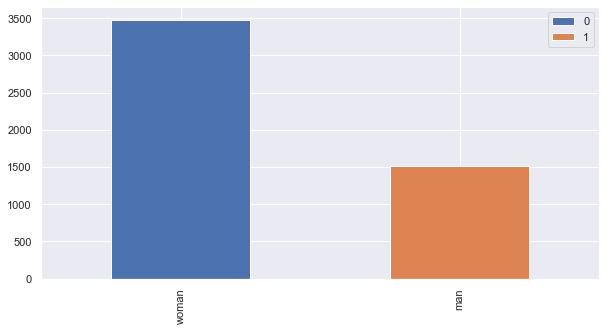

In [309]:
bar_chart('gender')

In [310]:
df1['gender'].value_counts(normalize=True)

0    0.6958
1    0.3042
Name: gender, dtype: float64

In [311]:
df1['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [312]:
import seaborn as sns

In [224]:
df1.rename(columns ={'총구매액':'total', '구매건수':'count','평균구매가격':'purchase', '평균할부개월수':'months',
                     '구매브랜드종류':'brand','내점일수':'visit','수입상품_구매비율':'IP','주말방문비율':'Weekend '}, inplace=True)
print(df1)

      custid gender    total  count  purchase  months  brand  visit    IP  \
0         18      0   680100     15     45340     1.7      9     10  26.7   
1         21      0   353450      9     39272     1.2      6      8  11.1   
2         23      0  5671400     36    157539     2.8     22     16   5.6   
3         26      0  1964000     28     70143     1.4     15     14  39.3   
4         35      0   885000      5    177000     6.0      5      2   0.0   
...      ...    ...      ...    ...       ...     ...    ...    ...   ...   
4995   49952      1  6666517     93     71683     1.8     27     39  10.8   
4996   49954      0  3112100     17    183065     3.6     10     13  29.4   
4997   49957      1  5852482     37    158175     2.6     14     21  40.5   
4998   49975      1   654498     13     50346     2.5     10      7   7.7   
4999   49993      1  2554723     32     79835     1.7      9     26  21.9   

      Weekend   가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건

In [225]:
df1.rename(columns ={'가을_구매건수':'autumn', '겨울_구매건수':'winter','봄_구매건수':'spring', '여름_구매건수':'summer',
                     '아침_구매건수':'morning','저녁_구매건수':'dinner','점심_구매건수':'lunch','주구매코너':'corner'}, inplace=True)
print(df1)

      custid gender    total  count  purchase  months  brand  visit    IP  \
0         18      0   680100     15     45340     1.7      9     10  26.7   
1         21      0   353450      9     39272     1.2      6      8  11.1   
2         23      0  5671400     36    157539     2.8     22     16   5.6   
3         26      0  1964000     28     70143     1.4     15     14  39.3   
4         35      0   885000      5    177000     6.0      5      2   0.0   
...      ...    ...      ...    ...       ...     ...    ...    ...   ...   
4995   49952      1  6666517     93     71683     1.8     27     39  10.8   
4996   49954      0  3112100     17    183065     3.6     10     13  29.4   
4997   49957      1  5852482     37    158175     2.6     14     21  40.5   
4998   49975      1   654498     13     50346     2.5     10      7   7.7   
4999   49993      1  2554723     32     79835     1.7      9     26  21.9   

      Weekend   autumn  winter  spring  summer  morning  dinner  lunch  \
0

<AxesSubplot:>

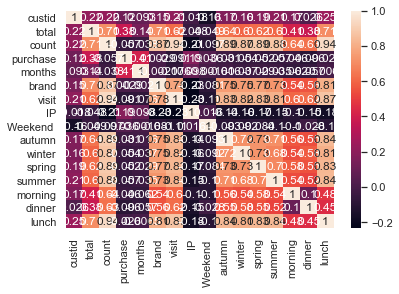

In [226]:
sns.heatmap(df1.corr(), annot=True)

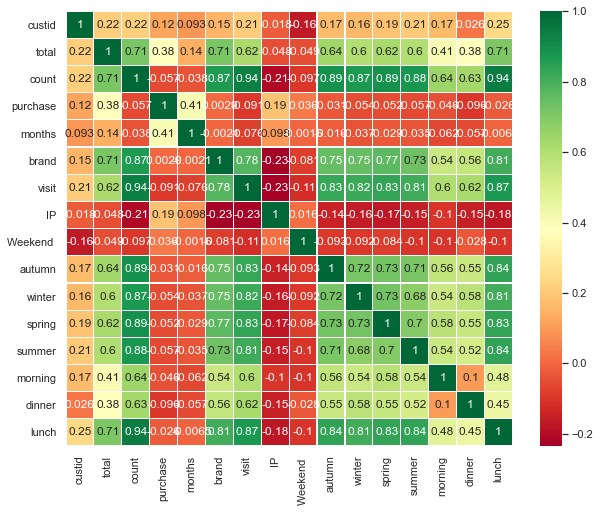

In [227]:
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [228]:
df1['corner'].value_counts(normalize=True)

일반식품        0.2612
화장품         0.2412
유니캐주얼       0.0820
유아동복        0.0766
스포츠         0.0602
영캐주얼        0.0492
캐릭터캐주얼      0.0376
수입명품        0.0272
섬유          0.0192
트래디셔널캐주얼    0.0182
니트단품        0.0182
정장셔츠        0.0180
엘레강스캐주얼     0.0156
피혁A         0.0150
장신구         0.0136
피혁B         0.0112
디자이너부띠끄     0.0102
문화완구        0.0076
조리욕실        0.0056
가전          0.0036
기타바이어       0.0024
도자기크리스탈     0.0022
침구수예        0.0016
가구          0.0014
타운모피        0.0012
Name: corner, dtype: float64

In [229]:
corner_label = df1['corner']\
        .value_counts(ascending=False, normalize=True)\
        .index

corner_vals = df1['corner']\
        .value_counts(ascending=False, normalize=True)\
        .values

In [230]:
corner_label

Index(['일반식품', '화장품', '유니캐주얼', '유아동복', '스포츠', '영캐주얼', '캐릭터캐주얼', '수입명품', '섬유',
       '트래디셔널캐주얼', '니트단품', '정장셔츠', '엘레강스캐주얼', '피혁A', '장신구', '피혁B', '디자이너부띠끄',
       '문화완구', '조리욕실', '가전', '기타바이어', '도자기크리스탈', '침구수예', '가구', '타운모피'],
      dtype='object')

In [231]:
corner_vals

array([0.2612, 0.2412, 0.082 , 0.0766, 0.0602, 0.0492, 0.0376, 0.0272,
       0.0192, 0.0182, 0.0182, 0.018 , 0.0156, 0.015 , 0.0136, 0.0112,
       0.0102, 0.0076, 0.0056, 0.0036, 0.0024, 0.0022, 0.0016, 0.0014,
       0.0012])

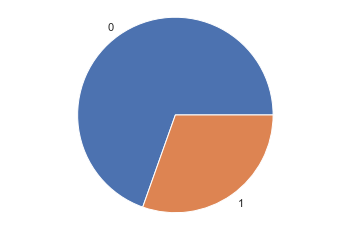

In [232]:
gender_label = df1['gender'].value_counts(ascending=False, normalize=True).index
# y의 값
gender_vals = df1['gender'].value_counts(ascending=False, normalize=True).values

# y의 원 그래프를 작성
plt.pie(gender_vals, labels=gender_label)
plt.axis('equal')
plt.show()

In [233]:
df1['total_band']=0
df1.loc[df1['total']<=200000,'total_band']=0
df1.loc[(df1['total']>200000)&(df1['total']<=400000),'total_band']=1
df1.loc[(df1['total']>400000)&(df1['total']<=600000),'total_band']=2
df1.loc[(df1['total']>600000)&(df1['total']<=800000),'total_band']=3
df1.loc[df1['total']>800000,'total_band']=4
df1.head()

,custid,gender,total,count,purchase,months,brand,visit,IP,Weekend,autumn,winter,spring,summer,morning,dinner,lunch,corner,total_band
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품,3
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼,1
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구,4
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품,4
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A,4


In [234]:
df1['total_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,total_band
4,3635
1,377
2,353
0,336
3,299


In [235]:
drop_cols = ['autumn', 'winter', 'spring','summer','morning','dinner','lunch']
df1 = df1.drop(drop_cols, axis=1).drop(['custid'], axis=1)

In [236]:
df1.head()

,gender,total,count,purchase,months,brand,visit,IP,Weekend,corner,total_band
0,0,680100,15,45340,1.7,9,10,26.7,100.0,화장품,3
1,0,353450,9,39272,1.2,6,8,11.1,37.5,영캐주얼,1
2,0,5671400,36,157539,2.8,22,16,5.6,37.5,장신구,4
3,0,1964000,28,70143,1.4,15,14,39.3,28.6,화장품,4
4,0,885000,5,177000,6.0,5,2,0.0,100.0,피혁A,4


In [237]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      5000 non-null   object 
 1   total       5000 non-null   int64  
 2   count       5000 non-null   int64  
 3   purchase    5000 non-null   int64  
 4   months      5000 non-null   float64
 5   brand       5000 non-null   int64  
 6   visit       5000 non-null   int64  
 7   IP          5000 non-null   float64
 8   Weekend     5000 non-null   float64
 9   corner      5000 non-null   object 
 10  total_band  5000 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 429.8+ KB


In [238]:
from sklearn.model_selection import train_test_split

In [239]:
dfX = df1.drop(['corner'], axis=1)
dfY = df1['corner']
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.20, random_state=0)

In [240]:
display(X_train.shape, X_test.shape)
X_train.head()

(4000, 10)

(1000, 10)

,gender,total,count,purchase,months,brand,visit,IP,Weekend,total_band
2913,1,5070232,63,80480,1.9,32,35,3.2,20.0,4
3275,1,738262,20,36913,1.4,13,14,5.0,28.6,3
775,0,521000,2,260500,2.5,2,2,50.0,0.0,2
217,0,7227043,59,122492,3.6,33,43,16.9,16.3,4
1245,0,504100,13,38777,1.6,11,8,23.1,62.5,2


In [241]:
df1.shape

(5000, 11)

In [242]:
dfX = df1.drop(['gender'], axis=1) 

In [243]:
dfy = df1['gender']

In [244]:
df1['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#model = KNeighborsClassifier()
model = LogisticRegression()
#model = DecisionTreeClassifier()

In [246]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [247]:
scores = cross_val_score(model, dfX, dfy); scores

C:\Users\021\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\021\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\021\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "C:\Users\021\Anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\021\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\021\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 795, in check_X_y
    X = check_array(X, accept_sparse=accept_s

array([nan, nan, nan, nan, nan])

In [248]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: nan
Std: nan
Min: nan
Max: nan


In [249]:
from imblearn.combine import *

In [250]:
from imblearn.combine import SMOTETomek

In [251]:
scores = cross_val_score(model, dfX, dfy); scores

C:\Users\021\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\021\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\021\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "C:\Users\021\Anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\021\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\021\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 795, in check_X_y
    X = check_array(X, accept_sparse=accept_s

array([nan, nan, nan, nan, nan])

In [252]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [253]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      5000 non-null   object 
 1   total       5000 non-null   int64  
 2   count       5000 non-null   int64  
 3   purchase    5000 non-null   int64  
 4   months      5000 non-null   float64
 5   brand       5000 non-null   int64  
 6   visit       5000 non-null   int64  
 7   IP          5000 non-null   float64
 8   Weekend     5000 non-null   float64
 9   corner      5000 non-null   object 
 10  total_band  5000 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 429.8+ KB


In [254]:
kneighbors = KNeighborsClassifier()
kneighbors.fit(X_train, Y_train)

KNeighborsClassifier()

In [255]:
display(kneighbors.score(X_train, Y_train))
display(kneighbors.score(X_test, Y_test))

0.463

0.246

In [256]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [257]:
display(tree.score(X_train, Y_train))
display(tree.score(X_test, Y_test))

0.53825

0.354

In [258]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, Y_train)

RandomForestClassifier()

In [259]:
display(randomforest.score(X_train, Y_train))
display(randomforest.score(X_test, Y_test))

0.99975

0.395

In [260]:
gradient = GradientBoostingClassifier()
gradient.fit(X_train, Y_train)

GradientBoostingClassifier()

In [261]:
display(gradient.score(X_train, Y_train))
display(gradient.score(X_test, Y_test))

0.739

0.375

In [262]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

GaussianNB()

In [263]:
display(gaussian.score(X_train, Y_train))
display(gaussian.score(X_test, Y_test))

0.31175

0.296

In [264]:
svm = SVC(random_state=0)
svm.fit(X_train, Y_train)

SVC(random_state=0)

In [265]:
display(svm.score(X_train, Y_train))
display(svm.score(X_test, Y_test))

0.331

0.302

In [266]:
best_model = gradient
best_model.score(X_test, Y_test)

0.375

In [267]:
from sklearn.dummy import DummyClassifier
print(Y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, Y_train).score(X_test, Y_test)

일반식품        259
화장품         231
유아동복         86
유니캐주얼        82
스포츠          62
영캐주얼         53
캐릭터캐주얼       32
수입명품         30
니트단품         25
섬유           22
정장셔츠         22
피혁A          21
트래디셔널캐주얼     15
엘레강스캐주얼      11
장신구          10
피혁B          10
조리욕실          6
디자이너부띠끄       6
문화완구          6
기타바이어         3
가전            2
가구            2
타운모피          2
침구수예          1
도자기크리스탈       1
Name: corner, dtype: int64


0.259